## Iris 데이터셋 SVM 알고리즘으로 분류하기

#### 라이브러리 및 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

C:\Users\user\AppData\Local\Temp\ipykernel_17612\2645145832.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### 데이터셋 불러오기

In [2]:
# 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [3]:
# train, test 데이터셋 분리
X = df[df.columns[:-1]]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [4]:
# 정규화 작업
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

#### 모델 학습

In [5]:
# SVM 모델 생성
model = SVC(kernel='poly', C = 3, degree = 3)
model.fit(X_train, y_train)

SVC(C=3, kernel='poly')

#### 성능 평가

In [6]:
# test 데이터셋도 정규화(train 데이터셋 기준으로 학습시킨 정규화 모듈 사용)
X_test = scaler.transform(X_test)

y_pred = model.predict(X_test) # 예측 라벨
accuracy_score(y_test, y_pred)

0.9111111111111111

#### 분류 결과 시각화

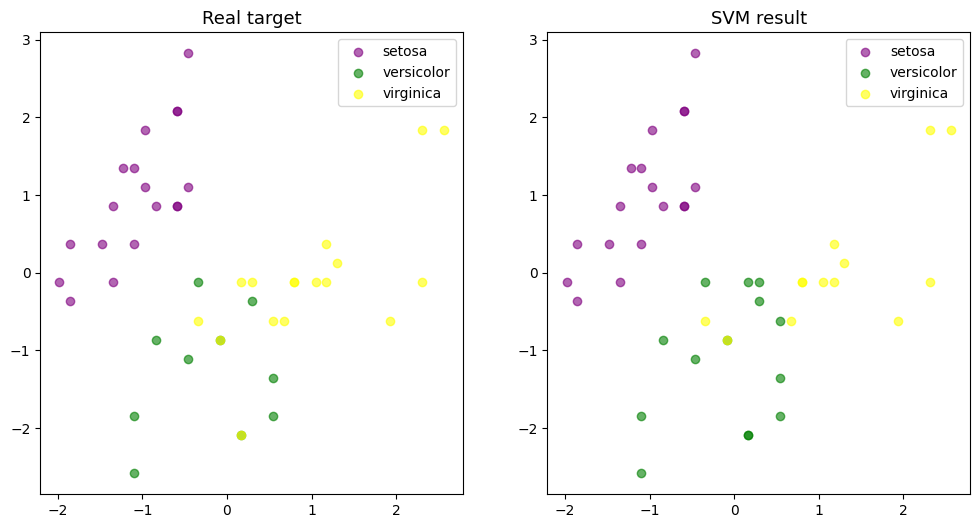

In [7]:
# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적)
index_0 = np.where(y_test == 0)[0]
index_1 = np.where(y_test == 1)[0]
index_2 = np.where(y_test == 2)[0]

index_0_p = np.where(y_pred == 0)[0]
index_1_p = np.where(y_pred == 1)[0]
index_2_p = np.where(y_pred == 2)[0]

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_test[index_0, 0], X_test[index_0, 1], color='purple', alpha=0.6, label='setosa')
plt.scatter(X_test[index_1, 0], X_test[index_1, 1], color='green', alpha=0.6, label='versicolor')
plt.scatter(X_test[index_2, 0], X_test[index_2, 1], color='yellow', alpha=0.6, label='virginica')
plt.title('Real target', size=13)
plt.legend()

plt.subplot(122)
plt.scatter(X_test[index_0_p, 0], X_test[index_0_p, 1], color='purple', alpha=0.6, label='setosa')
plt.scatter(X_test[index_1_p, 0], X_test[index_1_p, 1], color='green', alpha=0.6, label='versicolor')
plt.scatter(X_test[index_2_p, 0], X_test[index_2_p, 1], color='yellow', alpha=0.6, label='virginica')
plt.title('SVM result', size=13)
plt.legend()
plt.show()